<a href="https://colab.research.google.com/github/gemini106/SanaSubhedarTASKS/blob/master/movie_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


2. Data Exploration


In [13]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'COLUMN WISE MISSING VALUES')

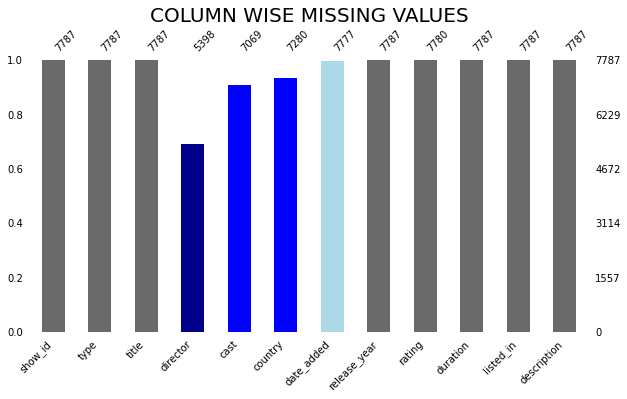

In [14]:
# Plot missing values in columns
import missingno #Python library for the exploratory visualization of missing data #install using !pip install missingno
color= ['dimgrey','dimgrey','dimgrey','darkblue','blue','blue','lightblue','dimgrey','dimgrey','dimgrey','dimgrey','dimgrey']
missingno.bar(df,fontsize=10,color=color,figsize=(10,5))
plt.title('COLUMN WISE MISSING VALUES',fontsize=20)


There are missing values in column director,cast,country and date_added.

We can't randomly fill the missing values in columns of director and cast, so we can drop them.

For minimal number of missing values in country and date_added,rating, we can fill them using mode(most common value) and mean.

In [15]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])

In [16]:
df = df.dropna( how='any',subset=['cast', 'director'])


In [17]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Cleaning

In [18]:
#Rename the 'listed_in' column as 'Genre' for easy understanding
df = df.rename(columns={"listed_in":"Genre"})
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])
df['Genre'].head()

1                    Dramas
2             Horror Movies
3        Action & Adventure
4                    Dramas
5    International TV Shows
Name: Genre, dtype: object

In [19]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_add'].head()

1    2016
2    2018
3    2017
4    2020
5    2017
Name: year_add, dtype: object

In [20]:
df['month_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_add'].head()

1    December
2    December
3    November
4     January
5        July
Name: month_add, dtype: object

In [21]:
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

1           Mexico
2        Singapore
3    United States
4    United States
5           Turkey
Name: country_main, dtype: object

In [22]:
df['type'].value_counts()

Movie      4834
TV Show     145
Name: type, dtype: int64

In [23]:
df['rating'].value_counts()

TV-MA            1724
TV-14            1183
R                 656
TV-PG             426
PG-13             378
PG                241
TV-Y               90
TV-G               85
TV-Y7              82
NR                 62
G                  38
UR                  5
United States       4
TV-Y7-FV            3
NC-17               2
Name: rating, dtype: int64

In [24]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [25]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_add,month_add,country_main
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December,Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,November,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,United States
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,Horror Movies,"After an awful accident, a couple admitted to ...",2020,June,Egypt


 Exploratory Data Analysis


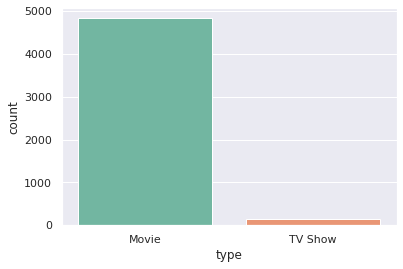

In [26]:
sb.set(style="darkgrid")
sb.countplot(x="type", data= df, palette="Set2")

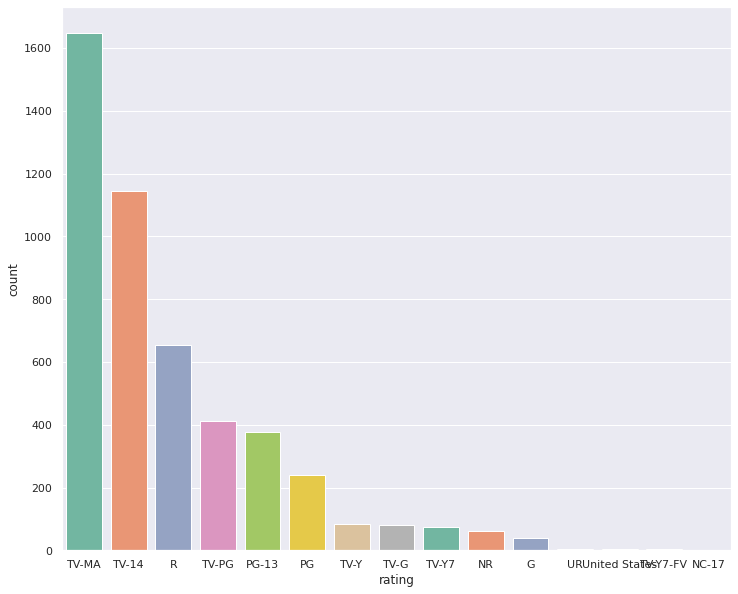

In [27]:
#MOVIES 

plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17.

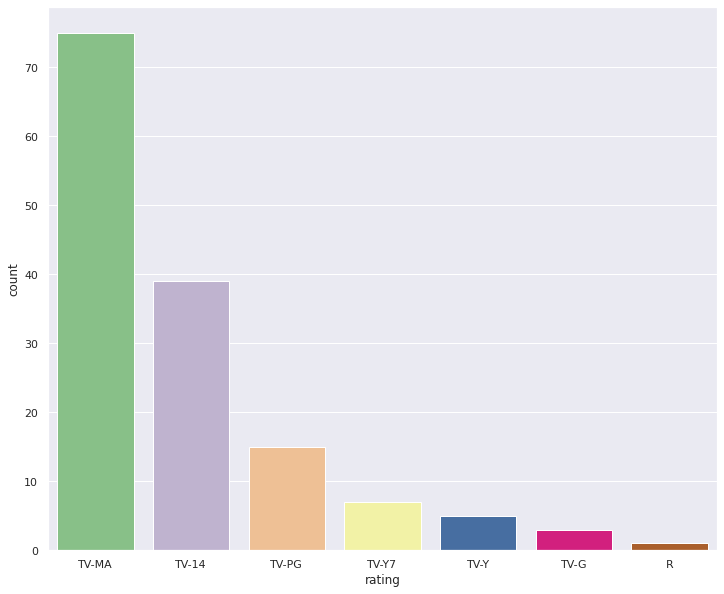

In [28]:
# TV SHOWS RATINGS

plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])

Most of the TV Shows has 'TV-14' ratings which stands for the content can be inappropriate for children under 14 years of age.

Second highest count of ratings in TV Shows is 'TV-MA', for which the content is for matured audience only.

TV Shows has least amount of counts with 'R' ratings.


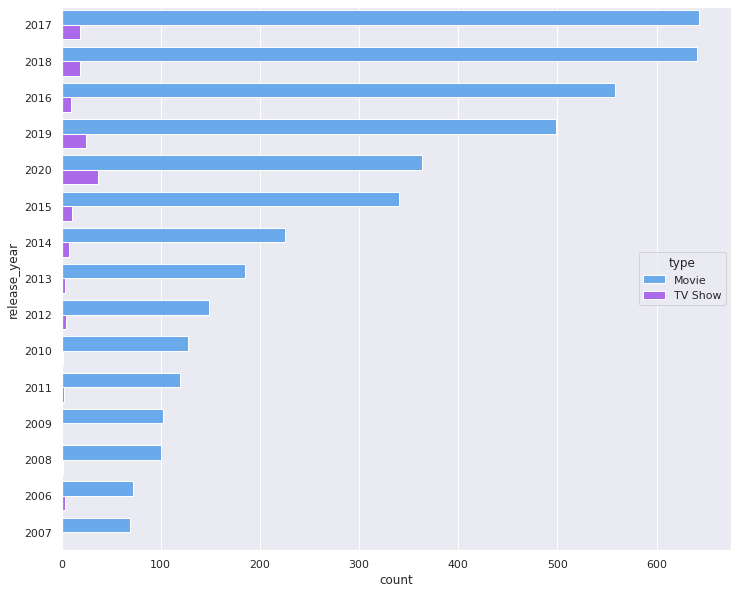

In [29]:
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(y="release_year", data= df, palette="cool", order= df['release_year'].value_counts().index[0:15],hue=df['type'])

We can see that Netflix released most number of content in year 2017.

Noticeable growth in releasing content can be seen from the year 2015.


**Analysis of movies duration**


In [30]:
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(str).astype(int)
movie_df['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7778     88
7780     94
7781     88
7782     99
7783    111
Name: duration, Length: 4834, dtype: int64

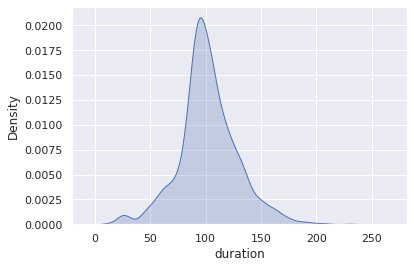

In [31]:
sb.set(style="darkgrid")
sb.kdeplot(data=movie_df['duration'], shade=True)

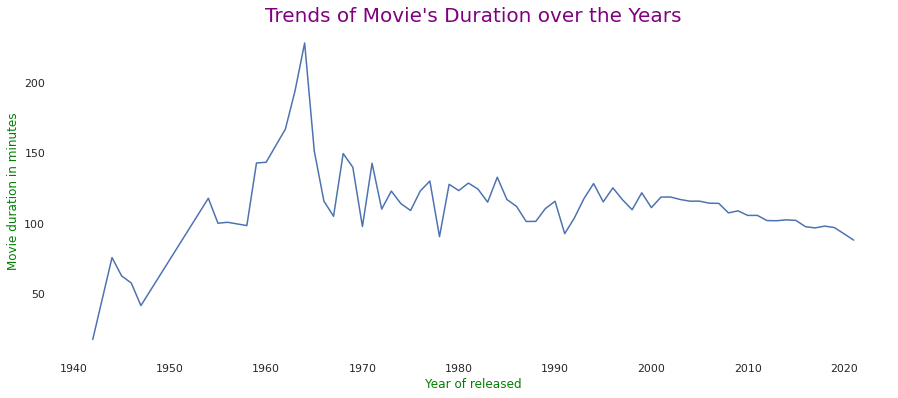

In [36]:
#Trends of movies duration

duration_year = movie_df.groupby(['release_year']).mean()
duration_year = duration_year.sort_index()

plt.figure(figsize=(15,6))
sb.lineplot(x=duration_year.index, y=duration_year.duration.values)
plt.box(on=None)
plt.ylabel('Movie duration in minutes', color= 'green');
plt.xlabel('Year of released', color= 'green');
plt.title("Trends of Movie's Duration over the Years", fontsize=20, color='purple');

In the years of 1960 to 1965, Movies durations were over 200 minutes, after 1965 the durations became comparitively shorter.

From the year 1980, we can see consistent trend of movie durations, of which duration time is around in between 100-150 minutes.

**Analysis of TV Shows with most number of seasons**


In [37]:
tv_df['duration']=tv_df['duration'].str.replace(' Season','')
tv_df['duration']=tv_df['duration'].str.replace('s','')
tv_df['duration']=tv_df['duration'].astype(str).astype(int)
tv_df['duration']

5       1
132     1
218     1
260     1
276     1
       ..
7385    1
7400    4
7492    1
7666    2
7721    2
Name: duration, Length: 145, dtype: int64

**Extract TV Shows titles and its number of seasons**




In [38]:
#Extract the columns from tv_df
columns=['title','duration']
tv_shows = tv_df[columns]

In [39]:
#sort the dataframe by number of seasons
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
5912,Supernatural,15
4404,Naruto,9
1181,Call the Midwife,9
584,Arrow,8
6415,The Great British Baking Show,8
5291,Royal Pains,8
6359,The Flash,6
2130,Father Brown,6
1470,Comedians in Cars Getting Coffee,6
2313,Fullmetal Alchemist: Brotherhood,5


<Figure size 720x432 with 0 Axes>

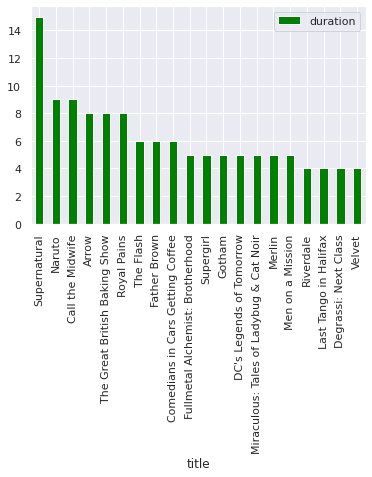

In [40]:
plt.figure(figsize=(10,6))
top20.plot(kind='bar',x='title',y='duration', color='green')



*   Supernatural , Naruto has the highest numbers of seasons




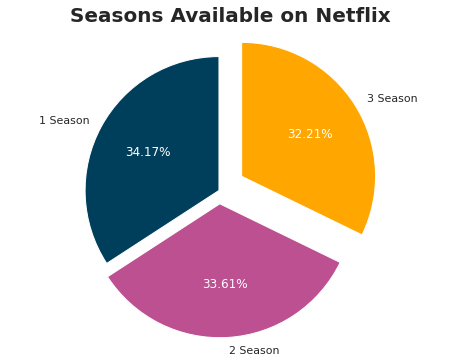

In [41]:
# TV SHOWS AND THEIR SEASONS
plt.figure(figsize=(8, 6))
labels=['1 Season', '2 Season', '3 Season']
_, _, texts = plt.pie(df.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1, 0.2), colors=['#003f5c', '#bc5090', '#ffa600'])
plt.axis('equal')
plt.title('Seasons Available on Netflix', fontsize=20, fontweight='bold');
for text in texts:
    text.set_color('white')

From the chart we can analyze, 35.04% TV Shows has only 1 Season,32.48% TV Shows has 2 seasons and 32.48% Tv Shows has 3 seasons available

**Countries** **on top for movies content creation**






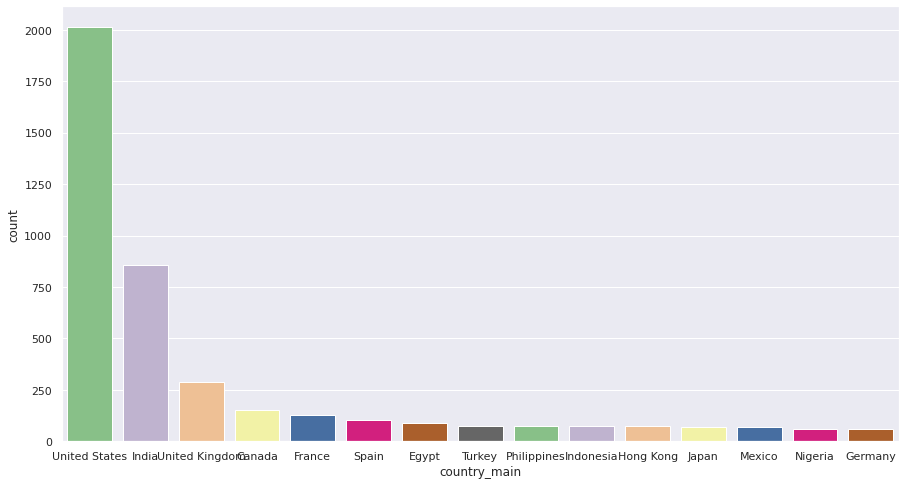

In [42]:
plt.figure(figsize=(15,8))
sb.set(style="darkgrid")
sb.countplot(x="country_main", data=movie_df, palette="Accent", order=movie_df['country_main'].value_counts().index[0:15])


**Countries** **on top for TV Show content creation**


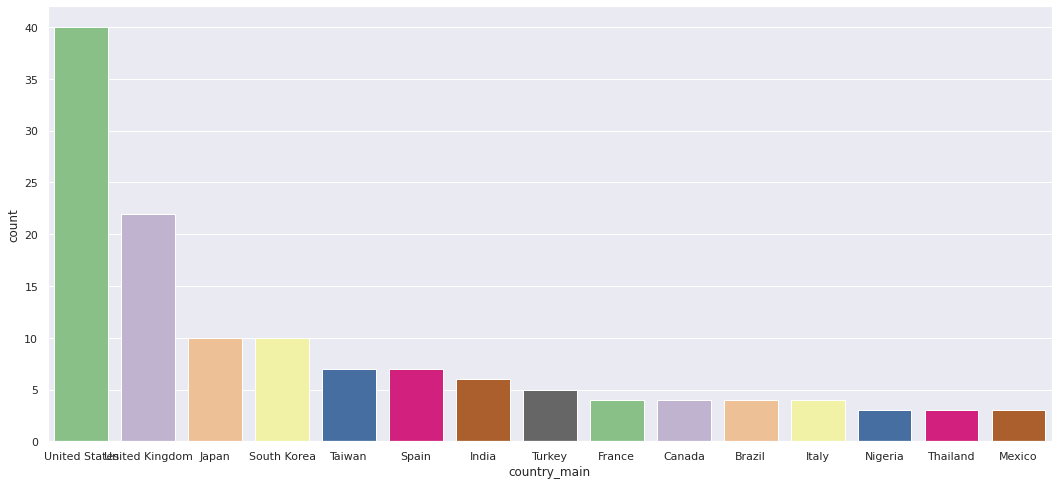

In [43]:
plt.figure(figsize=(18,8))
sb.set(style="darkgrid")
sb.countplot(x="country_main", data=tv_df, palette="Accent", order=tv_df['country_main'].value_counts().index[0:15])

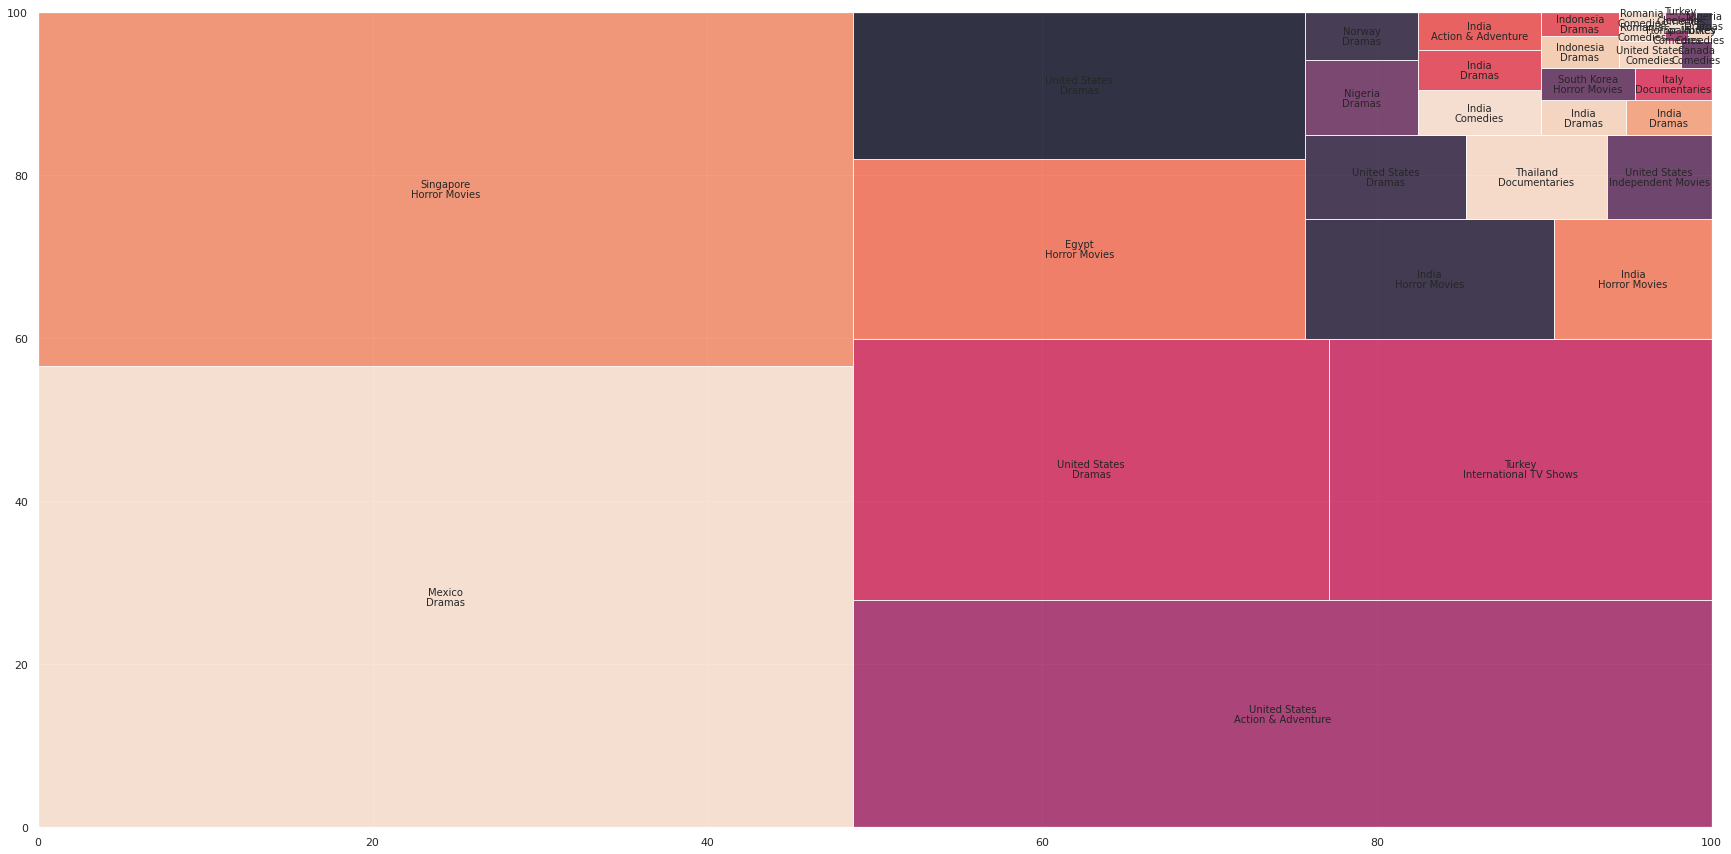

In [50]:
# GENRES BY COUNTRIES
#!pip install squarify
import squarify
plt.figure(figsize=(30,15))
columns=['Genre','country_main']
gen_country = df[columns]
size = gen_country['Genre'].value_counts().tolist()

squarify.plot(value= gen_country['Genre'], label= gen_country['country_main'], sizes= size, alpha=0.8)
plt.rc('font', size=14)
plt.show()

United states produces most amount of content in 'Comedies' and 'Childern & Family movies' Genres.


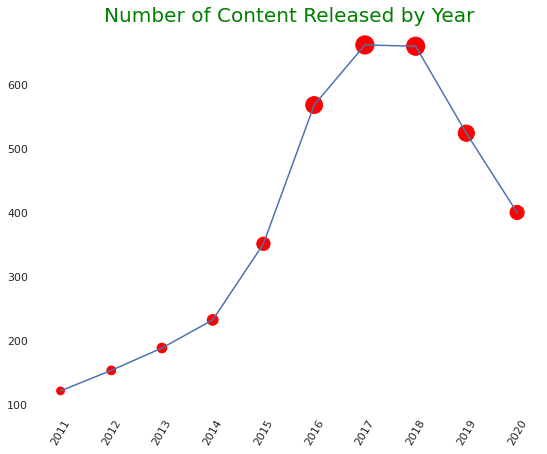

In [55]:
#Contents released by years


release = df['release_year'].value_counts()
release = release.sort_index(ascending=True)

plt.figure(figsize=(9,7))
plt.plot(release[-11:-1])
plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='Red');
plt.box(on=None);
plt.xticks(rotation = 60)
plt.xticks(release[-11:-1].index);
plt.title('Number of Content Released by Year', color='green', fontsize=20);

Directors with most number of Movies produced


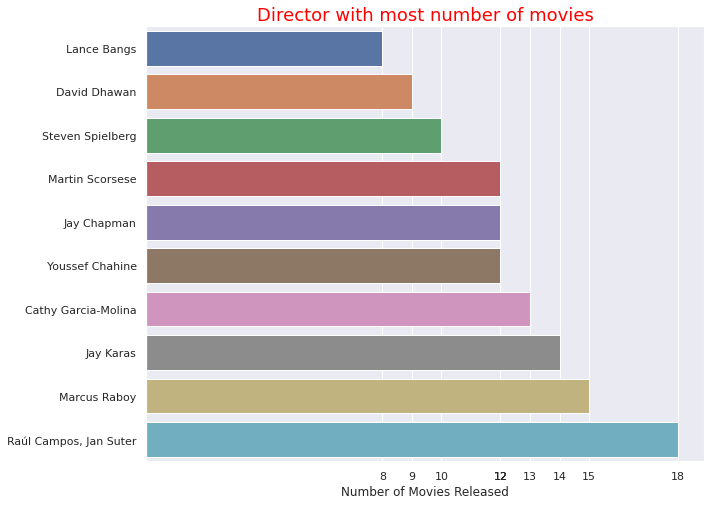

In [56]:
plt.figure(figsize=(10,8))
sb.barplot(y= movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of movies', color='red', fontsize=18)
plt.xticks(movie_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Movies Released');

Director Raul Campos,Jan Suter Produced highest number of movies: 18 on Netflix till now.


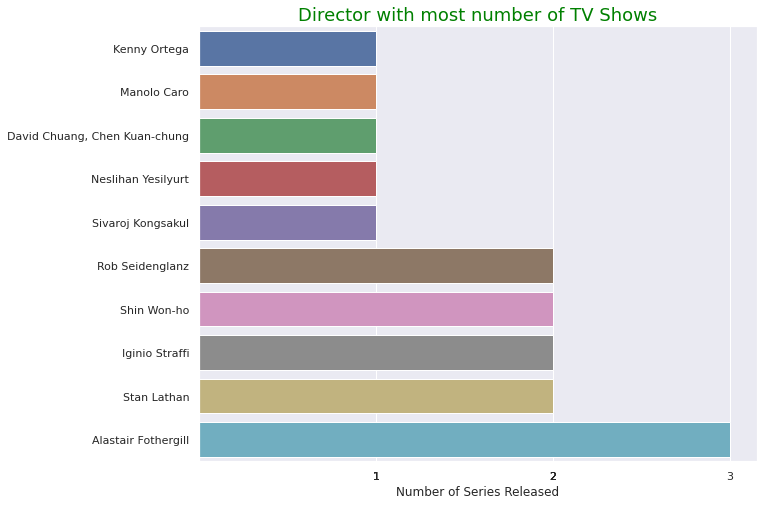

In [57]:
plt.figure(figsize=(10,8))
sb.barplot(y= tv_df.director.value_counts()[:10].sort_values().index, x=tv_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of TV Shows', color='green', fontsize=18)
plt.xticks(tv_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Series Released');

Director Alastair Fothergill released highest number of TV shows:3 on Netflix.


Text(0, 0.5, 'Number of contents')

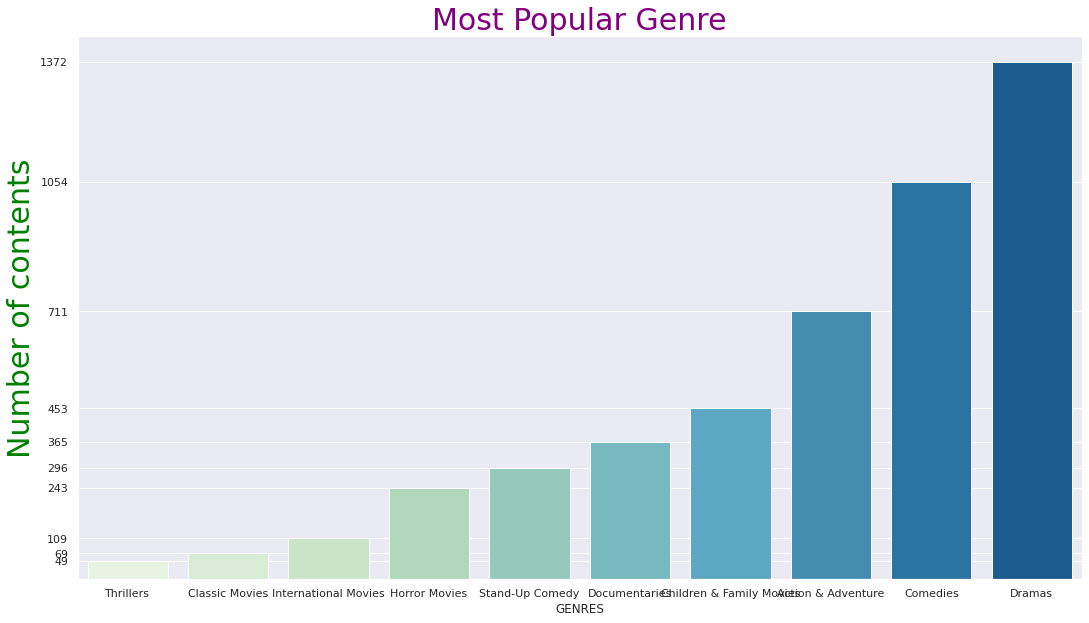

In [59]:
plt.figure(figsize=(18,10))
sb.barplot(x= df.Genre.value_counts()[:10].sort_values().index, y=df.Genre.value_counts()[:10].sort_values().values,palette='GnBu');
plt.title('Most Popular Genre', color='purple', fontsize=30)
plt.yticks(df.Genre.value_counts()[:10].sort_values().values);
plt.xlabel('GENRES');
plt.ylabel('Number of contents',color='green', fontsize=30)

Top Actor/Actresses on Netflix


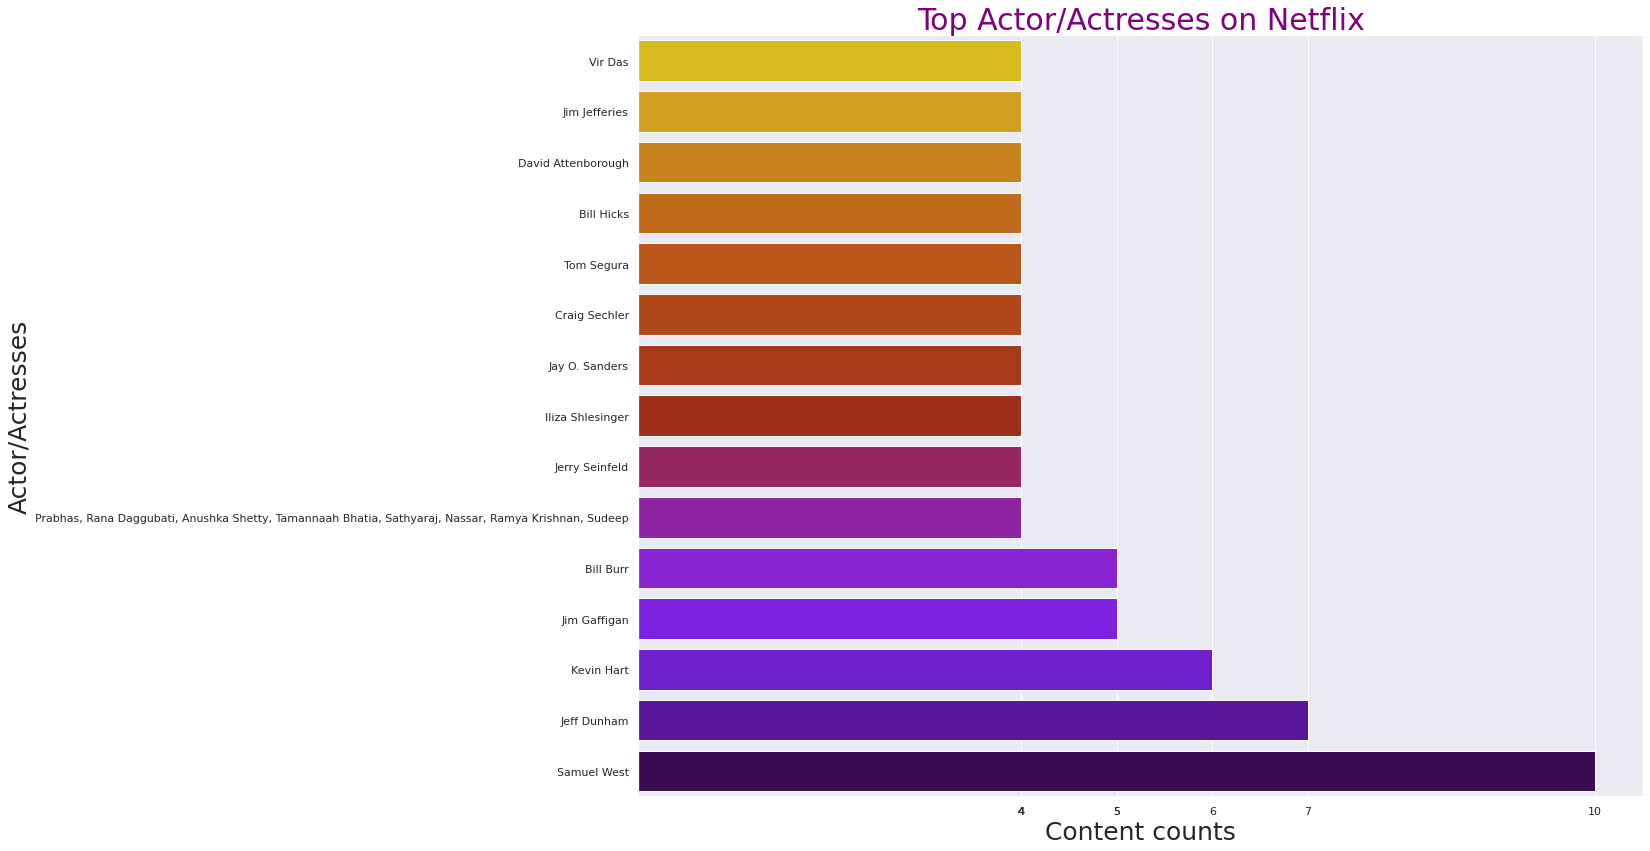

In [60]:
plt.figure(figsize=(18,14))
sb.barplot(y= df.cast.value_counts()[:15].sort_values().index, x=df.cast.value_counts()[:15].sort_values().values,palette='gnuplot_r');
plt.title('Top Actor/Actresses on Netflix', color='purple', fontsize=30)
plt.xticks(df.cast.value_counts()[:10].sort_values().values);
plt.ylabel('Actor/Actresses', fontsize=25);
plt.xlabel('Content counts', fontsize=25);